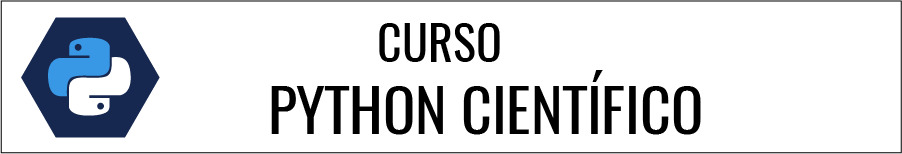

# Ajustes lineales, no lineales y busqueda de mínimos y máximos

# `SciPy`

- `SciPy` es una biblioteca libre y de código abierto para Python. Se compone de herramientas y algoritmos matemáticos. Se creó a partir de la colección original de Travis Oliphant, que se componía de módulos de extensión para Python y fue lanzada en 1999 bajo el nombre de Multipack, llamada así por los paquetes netlib que reunían a ODEPACK, QUADPACK, y MINPACK.

- `SciPy` contiene módulos para optimización, álgebra lineal, integración, interpolación, funciones especiales, FFT, procesamiento de señales y de imagen, resolución de ODEs y otras tareas para la ciencia e ingeniería.

- `SciPy` se basa en el objeto de matriz NumPy y es parte del conjunto NumPy, que incluye herramientas como Matplotlib, Pandas y SymPy, y un conjunto en expansión de bibliotecas de computación científica. Este conjunto está dirigido al mismo tipo de usuarios que los de aplicaciones como MATLAB, GNU Octave, y Scilab. A veces también se hace referencia a este conjunto de herramientas y bibliotecas como SciPy.

https://www.scipy.org/index.html  
https://www.scipy.org/install.html  
pip install scipy  
sudo pip3 install sympy

## Ajuste de funciones generales - SciPy

Si queremos hacer un ajuste general, no necesariamente polinómico, debemos usar alguno de los métodos del paquete optimize, que contiene varios optimizadores locales y globales. El más común es leastsq que, al ser un optimizador, hay que definir previamente una función residuo que es la que realmente se va minimizar.
Para ello necesitamos el paquete `SciPy`.

http://webs.ucm.es/info/aocg/python/modulos_cientificos/scipy/index.html

Su organización se estructura en subpaquetes, que se pueden considerar especializados en dominios científicos determinados. Podemos encontrar estos paquetes, según la ayuda de `SciPy`:

* linalg – Algebra lineal
* signal – Procesamiento de señales
* stats – Funciones estadísticas
* special – Funciones especiales
* integrate – Integración
* interpolate – Herramientas de interpolación
* optimize – Herramientas de optimización
* fftpack – Algortimos de transformada de Fourier
* io – Entrada y salida de datos
* lib.lapack – Wrappers a la librería LAPACK
* lib.blas – Wrappers a la librería BLAS
* lib – Wrappers a librerías externas
* sparse – Matrices sparse
* misc – otras utilidades
* cluster – Vector Quantization / Kmeans
* maxentropy – Ajuste a modelos con máxima entropía

Los subpaquetes de Scipy se tienen que importar de forma separada. Por ejemplo:

```Python
from scipy import linalg, optimize.
# Tanto Scipy como Numpy tienen versiones de su documentación en pdf y html en http://docs.scipy.org/. También se puede obtener ayuda de las funciones y de los módulos mediante
sp.info(funcion)
```
como por ejemplo
```Python
import scipy as sp               # Importamos el módulo scipy como el alias sp
sp.info(sp.optimize.fmin)        # Consultamos la información de la función fmin.
```
Otra forma de buscar información es con el comando source, que lista el código de esa función,
```Python
sp.source(sp.linspace)
```

##  Ajuste de una función usando `scipy.optimize  curve_fit`

In [1]:

"""
Descripción: Ejemplo de cómo usar la función curve_fit perteneciente a scipy.optimize para 
ajustar una función a una curva.
"""
import numpy as np
import matplotlib.pyplot as plt             # Importamos matplotlib.pyplot como el alias plt.
from scipy.optimize import curve_fit        # Importamos curve_fit de scipy.optimize

# import scipy as sp                          # Importamos scipy como el alias sp

Vamos a recrear el ejemplo anterior, resuelto con `NumPy` y compararemos los resultados del ajuste.  

In [44]:
n = 50                                              # haremos 50 datos con ruido aleatorio
jitter_amp = 4.0                                    # esto es la amplitud del ruido
x = np.linspace(0,10,n)                             # generamos la variable x
jitter = jitter_amp * (np.random.random(n)-0.5)     # calculamos el ruido para cada dato
y = x + jitter

Graficamos

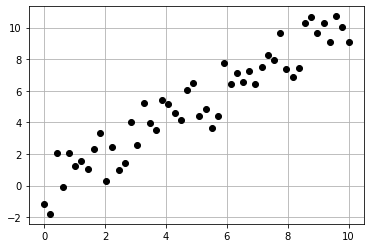

In [45]:
plt.plot(x,y,'ok')
plt.grid()

- Ahora definamos una función de ajuste

Rehagamos el ajuste usando NumPy a los efectos de comparar los coeficientes obtenidos

In [46]:
a = np.polyfit(x,y,1)    #  el número 1 significa que usaremos un polin de 1er grado
a

array([ 1.05179937, -0.04546776])

In [47]:
def fit_func(t, m, b):
    return m * t + b

Y utilizamos la función `optimize.curve_fit`

In [48]:
p, cov = curve_fit(fit_func,x,y)
p, a # observemos que a es el resulato obtenido con anterioridad

(array([ 1.05179937, -0.04546776]), array([ 1.05179937, -0.04546776]))

Esta es la matriz de covariancia

In [49]:
cov

array([[ 0.00281029, -0.01405143],
       [-0.01405143,  0.09463214]])

Ahora grafiquemos los resultados

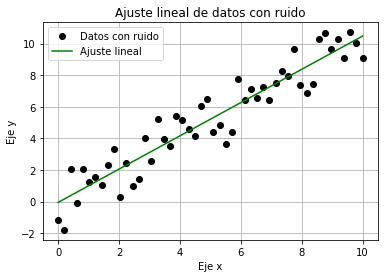

In [50]:
t = np.linspace(0,10,n)
plt.plot(x,y,'ok')
plt.plot(t, p[0]*t+p[1],'g') # Aqui utilizamos los resultados
plt.grid()
plt.xlabel('Eje x')
plt.ylabel('Eje y')
plt.title('Ajuste lineal de datos con ruido')
plt.legend(['Datos con ruido', 'Ajuste lineal'], loc = 0)

Para no usar datos experimentales reales, para ello definimos una función que a partir de unos coeficientes inventados crea un array y al que añadimos un array de numeros aleatorios de la misma dimension que x mediante sp.random.normal que ponderamos con el factor k.

Para este ejemplo imaginaremos un experimento, cuyos resultados en función del tiempo, vienen dados por la función,

$$experimen = a \cdot e^{\left(\frac{-bx^{2}}{2d^{2}}\right)}+c \cdot x$$

siendo a, b, c y d coeficientes desconocidos que el investigador saber para mejorar sus publicaciones.  

In [57]:
# definimos la función
def mi_funcion(x, a, b, c, d):
  """
  * (x, float, float, float, float ) --> (mismo_tipo_x)
  * Descripción: definición de una función general.
  * Entradas:
  - x = variable.
  - a, b, c, d = Coeficientes de la función.
  * Salidas:
  - a * np.exp(-b*x**2/(2*d**2)) + c * x
  * Test:
  >>> y = mi_funcion(5, 2.5, 1.3, 0.5,1)
  2.50000021911
  """

  return a * np.exp(-b*x**2/(2*d**2)) + c * x

In [58]:
# Añadimos ruido a la función

x = np.linspace(0, 5, 30)

a, b, c, d = 2.5, 1.3, 0.5, 1
y = mi_funcion(x, a, b, c, d)

def ruido(x,y,k):
    """
    * (array, array, float) --> (array)
    * Descripción: definición de una función general que mete ruido a la función creada.
    De esta forma simulamos puntos experimentales.
    * Entradas:
    - x, y = arrays dimensionales.
    * Salidas:
    - yn = array dimensional con los datos experimentales simulados
     """

    yn = y + k * np.random.normal(size = len(x))
    return yn
# Aqui `len(x)` nos dice cual es la longitud del vector con los datos, asi generamos otros 
# vector con el ruido que le sumamos a los datos medidos (simulados)

In [67]:
σ = 0.3 # dispersion del ruido
y_noise = ruido(x, y, σ)

Ajustamos nuestros datos experimentales recien creados a la función inicial mediante curve_fit. Los resultados los vamos a almacener en coeficientes_optimizados y covarianza_estimada que es la covarianza de los coeficientes optimizados,

In [68]:
# Ajustamos los datos experimentales a nuestra función y los almacenamos
coeficientes_optimizados, covarianza_estimada = curve_fit(mi_funcion, x, y_noise)

por último presentamos en pantalla,

In [69]:
# Mostramos los coeficientes calculados
# y = mi_funcion(x, 2.5, 1.3, 0.5, 1)
print('Coeficientes optimizados: ', coeficientes_optimizados)
print('Covarianza estimada: ', covarianza_estimada)

Coeficientes optimizados:  [2.39858077 0.67641808 0.49212106 0.71176457]
Covarianza estimada:  [[ 3.78647345e-02  3.17488883e+05 -5.16419827e-04  1.67039685e+05]
 [ 3.17488882e+05  1.32716719e+13 -2.95742452e+04  6.98259404e+12]
 [-5.16419825e-04 -2.95742452e+04  5.18679369e-04 -1.55598296e+04]
 [ 1.67039685e+05  6.98259404e+12 -1.55598296e+04  3.67373605e+12]]


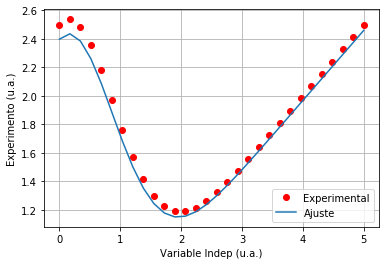

In [70]:
# Creamos la figura
plt.figure()

# Dibujamos los datos experimentales.
plt.plot(x,y,'ro', label = 'Experimental')

# Dibujamos
plt.plot(x,mi_funcion(x,coeficientes_optimizados[0],coeficientes_optimizados[1],coeficientes_optimizados[2], coeficientes_optimizados[3]), label = 'Ajuste')

# Añadimos la leyenda
plt.legend()

plt.xlabel('Variable Indep (u.a.)')
plt.ylabel('Experimento (u.a.)')
plt.grid()
#plt.grid(b=True, color='g')
# Mostramos la gráfica
plt.show()

## Ajuste por cuadrados mínimos usando `scipy.optimize  leastsq`

In [71]:
# import numpy as np
# from matplotlib import pyplot as plt
from scipy.optimize import leastsq
# %matplotlib inline
# Datos de laboratorio
datos_x = np.array([ 1.0, 2.0, 3.0, 4.0, 5.0])
datos_y = np.array([ 2.9, 6.1, 10.9, 12.8, 19.2])

In [72]:
# Función para calcular los residuos, donde
# se calcula (datos - modelo)
def residuos(p, y, x):
    error  = y - (p[0]*x + p[1])
    return error

In [73]:
# Parámetros iniciales estimados
# y = p0[0]*x  + p0[0]

p0 = [2.0, 0.0]

In [75]:
# Hacemos  el ajuste por minimos cuadrados con leastsq(). El primer parámetro
# es la funcion de residuos, luego los parámetro iniciales y una tupla con los
# argumentos de la funcion de residuos, en este caso, datos_y y datos_x en
# ese orden, porque así se definió la función de error
ajuste = leastsq(residuos, p0, args=(datos_y, datos_x))

In [76]:
print(ajuste)

(array([ 3.93, -1.41]), 1)


In [78]:
# El resultado es una lista, cuyo primer elemento es otra
# lista con los parámetros del ajuste
print(ajuste[0])
print(ajuste[0][0])
print(ajuste[0][1])
# array([ 3.93, -1.41])

[ 3.93 -1.41]
3.9300000000042097
-1.4100000000030766


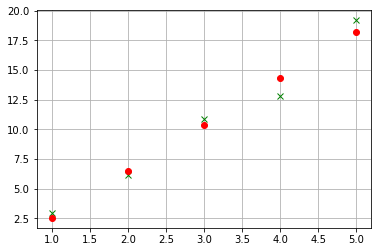

In [79]:
plt.plot(datos_x,datos_y,'xg', label = 'Datos de laboratorio')
yres = ajuste[0][0] * datos_x  + ajuste[0][1]
plt.plot(datos_x,yres,'or', label = 'Datos ajustados')
plt.grid()

Veamos otro ejemplo para ajustar una función seno:

In [21]:
from scipy import random

In [85]:
# Generamos unos datos artificiales para hacer el ejemplo
# A datos_y se le añade "ruido" que simula error de
# medida, añadiendole un valor aleatorio
datos_x = np.arange(0, 0.1, 0.003)
A, k, theta = 10.0, 33.3, np.pi/5.0  # Definimos tres datos
y_real = A * np.sin(2 * np.pi * k * datos_x + theta)   # Calculamos y
datos_y = y_real + 2 * random.randn(len(datos_x))   # Les metemos ruido para que parezcan reales

In [86]:
# Ahora se trata de ajustar estos datos una función
# modelo tipo senoidal A*sin(2*pi*k*x + theta)

# Defino la funcion de residuos
def residuos(p, y, x):
    A, k, theta = p
    error = y - A * np.sin(2 * np.pi * k * x + theta)
    return error

In [87]:
# Parámetros iniciales
# y = p[0]*np.sin(2*np.pi*p[1]*x + p[2])
# Si estos se alejan mucho del valor real
# la solución no convergerá
p0 = [8.0, 40.0, np.pi/3]

In [88]:
# hacemos  el ajuste por minimos cuadrados
ajuste = leastsq(residuos, p0, args=(datos_y, datos_x))

# El resultado es una lista, cuyo primer elemento es otra
# lista con los parámetros del ajuste.
print(ajuste[0])
# array([ -9.787095  ,  32.91201348,  -2.3390355 ]

[-10.616917    33.49862523   3.69617277]


In [90]:
# Defino la funcion modelo, para representarla gráficamente
def funcion(x, p):
    return p[0] * np.sin(2 * np.pi * p[1] * x + p[2])

In [91]:
# genero datos a partir del modelo para representarlo
x1 = np.arange(0, datos_x.max(), 0.001)  # array con muchos puntos de x
y1 = funcion(x1, ajuste[0])           # valor de la funcion modelo en los x

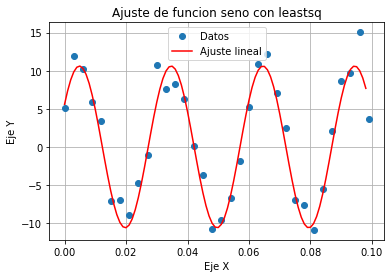

In [92]:
# Ahora muestro los datos y el ajuste gráficamente
plt.plot(datos_x, datos_y, 'o')  # datos

plt.plot(x1, y1, 'r-')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Ajuste de funcion seno con leastsq')
plt.legend(('Datos', 'Ajuste lineal'))
plt.grid()
plt.show()

Este ejemplo es bastante elaborado porque hemos usado un optimizador general para hacer un ajuste, pero podemos usar curve_fit() para ahorrarnos la función residuo.

La anterior es una manera artesanal de hacer el ajuste, al construir la función de error. Para un ajuste de datos

## Ajustando curvas
- Ajustar una curva es un procedimiento para encontrar la curva de mejor ajuste para un conjunto de puntos dado minimizando la suma de los cuadrados de los desplazamientos ("los residuos") de los puntos de la curva.

Definimos la función: $f(x) = x^2+10 \cdot sin(x)$

In [93]:
def f(x):
    return x**2 + 10*np.sin(x)

In [94]:
x = np.linspace(-10, 10, 51)
y = f(x)
y_noise = y + 5 * np.random.randn(x.size)  # Le añadiremos algo de ruido aleatorio
                                            # Devuelva una muestra (o muestras) de la distribución "normal estándar".

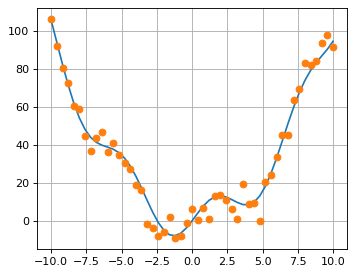

In [104]:
fig = plt.figure(figsize=(5, 4), dpi=80)
plt.plot(x, y)
plt.plot(x, y_noise, 'o')
plt.grid(True)
plt.show()

- Ajustaremos la función $f_2(x)=a x^2+b \sin(x)$ determinando los valores óptimos de los coeficientes `a` y `b`.

In [96]:
# Definimos la función con los parámetros de ajuste "a" y "b"
def f2(x, a, b):
    return a*x**2 + b*np.sin(x)

In [97]:
# Aqui importamos el módulo `scipy.optimize as opt`
import scipy.optimize as opt

In [98]:
guess = [2, 2]  # Valores inicial propuestos para a y b, respectivamente
params, cov = opt.curve_fit(f2, x, y_noise, guess)
params

array([ 1.01065957, 10.27113546])

In [99]:
a = params[0]
b = params[1]
y_fit = f2(x, a, b)
# y_fit

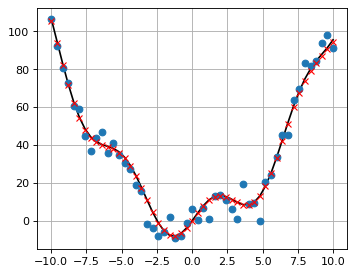

In [102]:
fig = plt.figure(figsize=(5, 4), dpi=80)
plt.plot(x, y_fit, 'k-')
plt.plot(x, y_noise, 'o')
plt.plot(x, y, 'rx')
plt.grid(True)
plt.show()

* Comparemos la función original con la ajustada



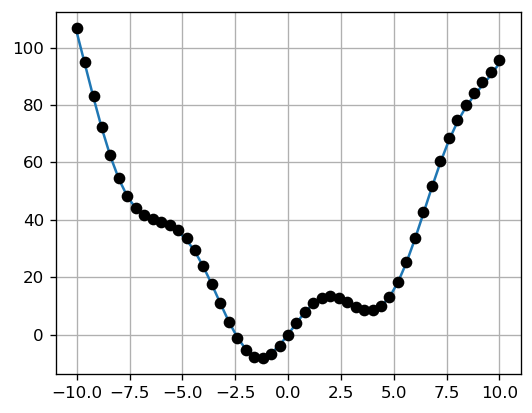

In [103]:
fig = plt.figure(figsize=(5, 4), dpi=120)
plt.plot(x, y)
plt.plot(x, y_fit, 'ko')
plt.grid(True)
plt.show()